In [3]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

## (a) face

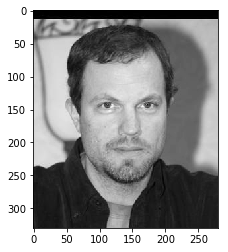

In [48]:
#read image
face = scipy.ndimage.imread('data/low-rank_data/face.jpg')
plt.imshow(face)
plt.set_cmap('gray')
plt.show()

In [43]:
def low_rank_approx(image, r):
    u, s, v = np.linalg.svd(image)
    s[r:] = 0
    s = np.vstack((np.diag(s), np.zeros((u.shape[0]-len(s), v.shape[0]))))
    return u.dot(s).dot(v)

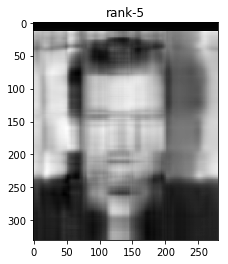

In [53]:
face_lr5 = low_rank_approx(face, 5)
plt.imshow(face_lr5)
plt.set_cmap('gray')
plt.title('rank-5')
plt.show()

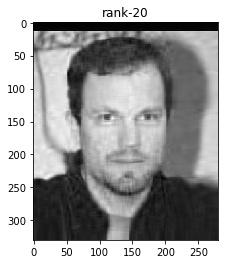

In [55]:
face_lr20 = low_rank_approx(face, 20)
plt.imshow(face_lr20)
plt.set_cmap('gray')
plt.title('rank-20')
plt.show()

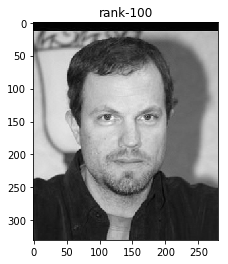

In [54]:
face_lr100 = low_rank_approx(face, 100)
plt.imshow(face_lr100)
plt.set_cmap('gray')
plt.title('rank-100')
plt.show()

## (b) MSE

In [57]:
def plot_MSE(image, rank_range):
    all_MSE = np.zeros(len(rank_range))
    for i, r in enumerate(rank_range):
        image_lr = low_rank_approx(face, r)
        all_MSE[i] = np.sum(np.square(image_lr-image))
    plt.plot(rank_range, all_MSE)
    plt.show()

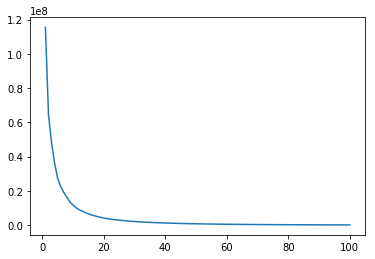

In [58]:
plot_MSE(face, range(1, 101))

## (c) sky

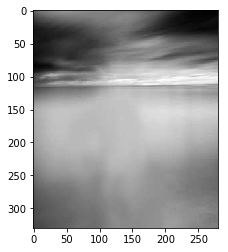

In [64]:
sky = scipy.ndimage.imread('data/low-rank_data/sky.jpg')
plt.imshow(sky)
plt.set_cmap('gray')
plt.show()

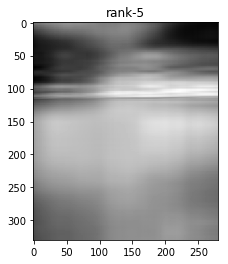

In [61]:
sky_lr5 = low_rank_approx(sky, 5)
plt.imshow(sky_lr5)
plt.set_cmap('gray')
plt.title('rank-5')
plt.show()

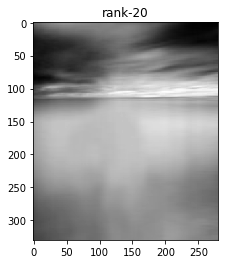

In [63]:
sky_lr20 = low_rank_approx(sky, 20)
plt.imshow(sky_lr20)
plt.set_cmap('gray')
plt.title('rank-20')
plt.show()

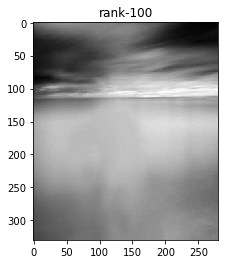

In [65]:
sky_lr100 = low_rank_approx(sky, 100)
plt.imshow(sky_lr100)
plt.set_cmap('gray')
plt.title('rank-100')
plt.show()

## (d) find the threshold

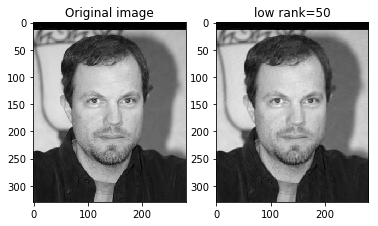

In [79]:
# face
lr = 50
face_lr = low_rank_approx(face, lr)
plt.subplot(121)
plt.imshow(face)
plt.set_cmap('gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(face_lr)
plt.set_cmap('gray')
plt.title('low rank=%d' % lr)
plt.show()
# about 50

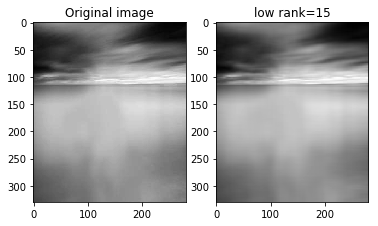

In [78]:
# sky
lr = 15
sky_lr = low_rank_approx(sky, lr)
plt.subplot(121)
plt.imshow(sky)
plt.set_cmap('gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(sky_lr)
plt.set_cmap('gray')
plt.title('low rank=%d' % lr)
plt.show()
# about 15